In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Pour avoir les float sans puissance de 10
pd.options.display.float_format = '{:.5f}'.format

In [3]:
# Chargement du fichier en mémoire
df = pd.read_csv('data_energy.csv',sep=";", header=1)
df

,OPERATEUR,CODE_EIC,ANNEE,FILIERE,IRIS_CODE,IRIS_LIBELLE,ADRESSE,NOM_COMMUNE,CODE_GRAND_SECTEUR,CONSO,PDL
0,Enedis,17X100A100A0001A,2020,E,060850102,Aubarède-Campelières,2070 CHEMIN NOTRE DAME DE VIE,MOUGINS,T,40.96139,1.00000
1,Enedis,17X100A100A0001A,2020,E,060850101,Village-Le Val-Cabrières,44 CHEMIN DE LA MOUGINE,MOUGINS,T,39.08166,1.00000
2,Enedis,17X100A100A0001A,2020,E,060850101,Village-Le Val-Cabrières,762 AVENUE DE TOURNAMY,MOUGINS,T,74.26152,1.00000
3,Enedis,17X100A100A0001A,2020,E,060850104,Saint-Martin-Le Miracle,1595 AVENUE DE LA PLAINE,MOUGINS,I,65.27439,1.00000
4,Enedis,17X100A100A0001A,2020,E,060850104,Saint-Martin-Le Miracle,853 AVENUE DE LA PLAINE,MOUGINS,R,148.51813,18.00000
...,...,...,...,...,...,...,...,...,...,...,...
73779,Enedis,17X100A100A0001A,2020,E,173470103,Est,252 RUE FRANCE III,SAINT-JEAN-D'ANGÉLY,T,105.64003,1.00000
73780,Enedis,17X100A100A0001A,2020,E,173470104,Sud,13 RUE DE L ANCIENNE POUDRIERE,SAINT-JEAN-D'ANGÉLY,R,374.72022,84.00000
73781,Enedis,17X100A100A0001A,2020,E,173470104,Sud,16 RUE PIERRE LOTI,SAINT-JEAN-D'ANGÉLY,R,64.00812,18.00000
73782,Enedis,17X100A100A0001A,2020,E,173480000,Saint-Jean-d'Angle (commune non irisée),FIEF DES GRANDS BOIS,SAINT-JEAN-D'ANGLE,T,12.59315,1.00000


In [4]:
df["ANNEE"] = pd.to_datetime(df["ANNEE"], format="%Y")

In [5]:
# Information sur les variables
print(df.shape, "\n")
print(df.dtypes, "\n")


(73784, 11) 

OPERATEUR                     object
CODE_EIC                      object
ANNEE                 datetime64[ns]
FILIERE                       object
IRIS_CODE                     object
IRIS_LIBELLE                  object
ADRESSE                       object
NOM_COMMUNE                   object
CODE_GRAND_SECTEUR            object
CONSO                        float64
PDL                          float64
dtype: object 



In [6]:
print(df["OPERATEUR"].value_counts(), "\n")
print("Nombre de valeurs manquante dans CONSO :", df['CONSO'].isna().sum())

Enedis    73707
RTE          77
Name: OPERATEUR, dtype: int64 

Nombre de valeurs manquante dans CONSO : 1


# Visualisation graphique

In [7]:
df_sorted = df.sort_values(by='CONSO', ascending=False).dropna().reset_index()
df_sorted.head(3)

,index,OPERATEUR,CODE_EIC,ANNEE,FILIERE,IRIS_CODE,IRIS_LIBELLE,ADRESSE,NOM_COMMUNE,CODE_GRAND_SECTEUR,CONSO,PDL
0,47503,RTE,RTE 10XFR-RTE,2020-01-01,E,130560120,Lavéra,NON RENSEIGNEE,MARTIGUES,I,1293039.29000,1.00000
1,44408,RTE,RTE 10XFR-RTE,2020-01-01,E,130390103,Audience-Fenouillère-Cavaou-Clapet,NON RENSEIGNEE,FOS-SUR-MER,I,871187.44800,2.00000
2,44991,RTE,RTE 10XFR-RTE,2020-01-01,E,130390104,Brûle-Tabac-Roque-Galejon,"9001, LES MARAIS",FOS-SUR-MER,I,745369.23400,1.00000


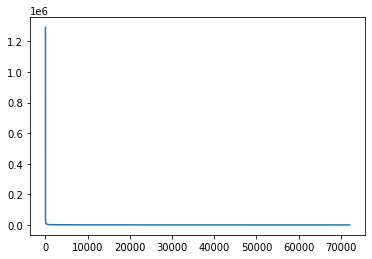

In [8]:
# Ensemble des données
plt.plot(df_sorted['CONSO'])

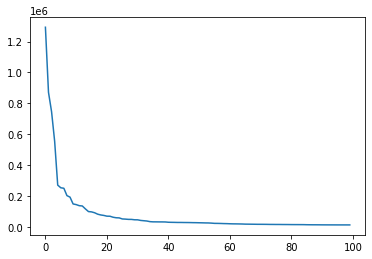

In [9]:
# Les 100 plus grandes données
plt.plot(df_sorted['CONSO'][:100])

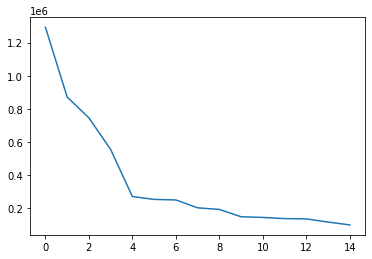

In [10]:
# Les 15 plus grandes données
plt.plot(df_sorted['CONSO'][:15])

# Cartographie

In [11]:
new_df = df_sorted[:15].sort_values(by='CONSO', ascending=True)
new_df.head(3)

,index,OPERATEUR,CODE_EIC,ANNEE,FILIERE,IRIS_CODE,IRIS_LIBELLE,ADRESSE,NOM_COMMUNE,CODE_GRAND_SECTEUR,CONSO,PDL
14,44765,RTE,RTE 10XFR-RTE,2020-01-01,E,130260106,Le Clos,NON RENSEIGNEE,CHÂTEAUNEUF-LES-MARTIGUES,I,98074.15000,1.00000
13,48885,RTE,RTE 10XFR-RTE,2020-01-01,E,010270000,Balan (commune non irisée),HORS PERIMETRE,BALAN,I,115392.46300,2.00000
12,44098,RTE,RTE 10XFR-RTE,2020-01-01,E,130390103,Audience-Fenouillère-Cavaou-Clapet,"9001, LES MARAIS",FOS-SUR-MER,I,134329.08400,2.00000


In [12]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
from vega_datasets import data as vds

In [13]:
# map with location start point
map1 = folium.Map(location=[47, 2], zoom_start=6, width=650, height=630, control_scale =True, min_zoom=6)


# Pour chaque ligne de données
for i in range(len(new_df)):

    # Recherche de la localisation
    for var in ["ADRESSE", "IRIS_LIBELLE", "NOM_COMMUNE"]:
        lieu = new_df.iloc[i][var]
        addresse = geocoder.osm(lieu)
        adresse_latlng = [addresse.lat, addresse.lng]
        if adresse_latlng[0] != None:
            break
    
    # Message du popup
    popup = ("IRIS_LIBELLE : " + new_df.iloc[i]["IRIS_LIBELLE"] + 
             "\nADRESSE : " + new_df.iloc[i]["ADRESSE"] + 
             "\nNOM_COMMUNE : " + new_df.iloc[i]["NOM_COMMUNE"] + 
             "\nCONSO : " + str(new_df.iloc[i]["CONSO"]) + 
             "\nPDL : " + str(new_df.iloc[i]["PDL"]))
    
    # Ajout d'une marque sur la carte
    folium.Marker(adresse_latlng, popup=popup, 
                  #icon=folium.Icon(color="green", icon="bolt", prefix="fa"),
                  icon=plugins.BeautifyIcon(number=i, 
                                         border_color="blue", border_width=1, text_color='red',
                                         inner_icon_style="margin-top:0px;"),
                  tooltip=lieu).add_to(map1)
    
    # Cercle de couleur
    color = ['red', 'blue', 'green', 'orange', 'pink', 'black', "brown", "grey", "purple", "beige", "white", 'yellow', 'blue', 'green', 'orange']
    radius = 20+i*2
    folium.CircleMarker(location=adresse_latlng, radius=radius, color=color[i], fill_color=color[i]).add_to(map1)


# Visualisation
map1